#### Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.

Fixed Acidity:

Importance: Contributes to wine acidity, influencing taste and stability.

Volatile Acidity:

Importance: Measures volatile acids, impacting flavor and aroma.

Citric Acid:

Importance: Adds freshness and fruitiness to wine.

Residual Sugar:

Importance: Reflects sweetness after fermentation.

Chlorides:

Importance: Influences saltiness and taste perception.
Role in Quality Prediction: Maintaining appropriate levels is crucial for taste.
Free Sulfur Dioxide:

Importance: Acts as a preservative, protecting against oxidation.

Total Sulfur Dioxide:

Importance: Comprehensive measure of sulfur content.

Density:

Importance: Reflects mass per unit volume, influenced by sugar and alcohol.

pH:

Importance: Measures acidity or basicity, affecting stability and taste.

Sulphates:

Importance: Contribute to antioxidant properties and microbial stability.

Alcohol:

Importance: Influences body, mouthfeel, and warmth perception.

#### Q2. How did you handle missing data in the wine quality data set during the feature engineering process?
#### Discuss the advantages and disadvantages of different imputation techniques.

Mean/Median Imputation:

Advantages: Simple, quick, preserves overall distribution.
Disadvantages: Not suitable for skewed data, ignores relationships.

Mode Imputation:

Advantages: Suitable for categorical data, preserves frequent category.
Disadvantages: Ignores variability, may not work for multiple modes.

Forward Fill/Backward Fill:

Advantages: Preserves temporal order, intuitive for time-series.
Disadvantages: Not for non-time series, may propagate errors.

#### Q3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?

In [1]:
import pandas as pd
df=pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Q4. Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?

In [3]:
## Aggregate the total score with mean

df['total_score']=(df['math_score']+df['reading_score']+df['writing_score'])
df['average']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


#### Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?

In [4]:
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


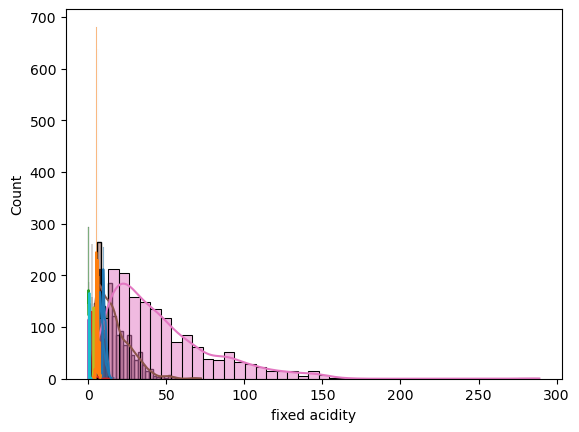

In [5]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
for column in df.columns:
    sns.histplot(df[column],kde=True)

#### Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of features. What is the minimum number of principal components required to explain 90% of the variance in the data?

In [6]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = df.drop('quality', axis=1)
y = df['quality']

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Calculate the cumulative explained variance ratio
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components needed for 90% variance
num_components_90_percent = np.argmax(explained_variance_ratio_cumulative >= 0.9) + 1

print(f"Number of principal components to explain 90% of variance: {num_components_90_percent}")


Number of principal components to explain 90% of variance: 7
